<a href="https://colab.research.google.com/github/varshum12/23-sept-2025-adv-python-/blob/main/LSTM%20Stock%20%20market%20%20data%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import yfinance as  yf

In [2]:
data  =  yf.download('MSFT' ,  period='5y')

/tmp/ipython-input-2120185165.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data  =  yf.download('MSFT' ,  period='5y')
[*********************100%***********************]  1 of 1 completed


In [3]:
data

Price,Close,High,Low,Open,Volume
Ticker,MSFT,MSFT,MSFT,MSFT,MSFT
Date,,,,,
2020-10-15,210.615601,211.286775,207.115879,208.161010,22733100
2020-10-16,210.615601,213.137302,210.289603,211.085416,26057900
2020-10-19,205.399536,213.146846,204.920124,211.344249,27625800
2020-10-20,205.811859,208.419865,204.316094,206.914517,22753500
2020-10-21,205.955688,207.988394,204.344854,204.344854,22724900
...,...,...,...,...,...
2025-10-08,524.849976,526.950012,523.090027,523.280029,13363400
2025-10-09,522.400024,524.330017,517.400024,522.340027,18343600


In [4]:
data.columns

MultiIndex([( 'Close', 'MSFT'),
            (  'High', 'MSFT'),
            (   'Low', 'MSFT'),
            (  'Open', 'MSFT'),
            ('Volume', 'MSFT')],
           names=['Price', 'Ticker'])

In [ ]:
data.rename(columns =  {'( 'Close', 'MSFT')' :  'close'} ,  inplace  = True)

SyntaxError: invalid syntax. Perhaps you forgot a comma? (ipython-input-956949121.py, line 1)

In [10]:
data.columns    = ['close' ,  'high' ,  'low' ,  'open' ,  'volumn']

In [11]:
data

,close,high,low,open,volumn
Date,,,,,
2020-10-15,210.615601,211.286775,207.115879,208.161010,22733100
2020-10-16,210.615601,213.137302,210.289603,211.085416,26057900
2020-10-19,205.399536,213.146846,204.920124,211.344249,27625800
2020-10-20,205.811859,208.419865,204.316094,206.914517,22753500
2020-10-21,205.955688,207.988394,204.344854,204.344854,22724900
...,...,...,...,...,...
2025-10-08,524.849976,526.950012,523.090027,523.280029,13363400
2025-10-09,522.400024,524.330017,517.400024,522.340027,18343600
2025-10-10,510.959991,523.580017,509.630005,519.640015,24133800


In [12]:
data.index

DatetimeIndex(['2020-10-15', '2020-10-16', '2020-10-19', '2020-10-20',
               '2020-10-21', '2020-10-22', '2020-10-23', '2020-10-26',
               '2020-10-27', '2020-10-28',
               ...
               '2025-10-01', '2025-10-02', '2025-10-03', '2025-10-06',
               '2025-10-07', '2025-10-08', '2025-10-09', '2025-10-10',
               '2025-10-13', '2025-10-14'],
              dtype='datetime64[ns]', name='Date', length=1255, freq=None)

In [17]:
df  =  data[['close']]

In [18]:
type(df)

pandas.core.frame.DataFrame

In [19]:
df

,close
Date,
2020-10-15,210.615601
2020-10-16,210.615601
2020-10-19,205.399536
2020-10-20,205.811859
2020-10-21,205.955688
...,...
2025-10-08,524.849976
2025-10-09,522.400024
2025-10-10,510.959991


In [20]:
import matplotlib.pyplot as plt


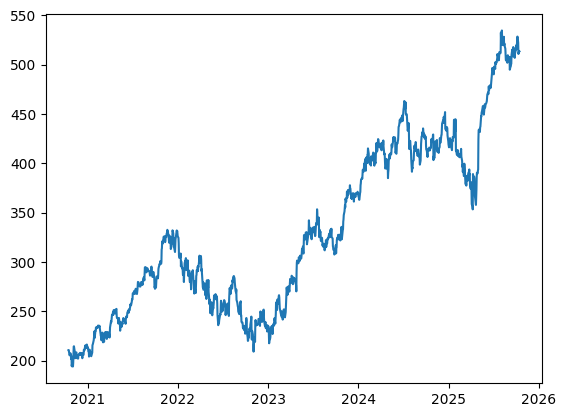

In [21]:
plt.plot(df)

In [22]:
df.head()

,close
Date,
2020-10-15,210.615601
2020-10-16,210.615601
2020-10-19,205.399536
2020-10-20,205.811859
2020-10-21,205.955688


In [23]:
df.tail()

,close
Date,
2025-10-08,524.849976
2025-10-09,522.400024
2025-10-10,510.959991
2025-10-13,514.049988
2025-10-14,513.570007


In [24]:
# use  scaling
from  sklearn.preprocessing import MinMaxScaler
mm  =  MinMaxScaler()

In [25]:
import pandas as pd

In [26]:
df  = pd.DataFrame(mm.fit_transform(df) ,  columns  =  ['close'] )

In [28]:
df.index =  data.index

In [29]:
df

,close
Date,
2020-10-15,0.048763
2020-10-16,0.048763
2020-10-19,0.033456
2020-10-20,0.034666
2020-10-21,0.035088
...,...
2025-10-08,0.970915
2025-10-09,0.963726
2025-10-10,0.930154


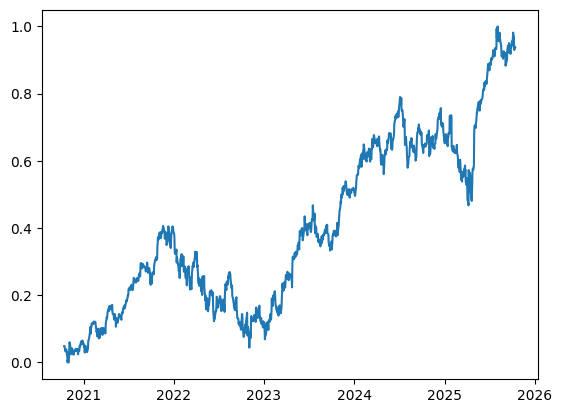

In [30]:
plt.plot(df)

In [32]:
def lagged_data(df  ,  lag):
  for  i  in range(lag):
    df[f'lag{i+1}'] =  df['close'].shift(i+1)
  return  df

In [33]:
df1  =  lagged_data(df  , 60)

In [34]:
df1.shape

(1255, 61)

In [35]:
df1.head()

,close,lag1,lag2,lag3,lag4,lag5,lag6,lag7,lag8,lag9,...,lag51,lag52,lag53,lag54,lag55,lag56,lag57,lag58,lag59,lag60
Date,,,,,,,,,,,,,,,,,,,,,
2020-10-15,0.048763,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-10-16,0.048763,0.048763,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-10-19,0.033456,0.048763,0.048763,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-10-20,0.034666,0.033456,0.048763,0.048763,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-10-21,0.035088,0.034666,0.033456,0.048763,0.048763,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
df1  =  df1.dropna()

In [37]:
df1

,close,lag1,lag2,lag3,lag4,lag5,lag6,lag7,lag8,lag9,...,lag51,lag52,lag53,lag54,lag55,lag56,lag57,lag58,lag59,lag60
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-12,0.037037,0.044259,0.050268,0.046516,0.029476,0.045416,0.044823,0.058167,0.056080,0.063048,...,0.000985,0.030726,0.021807,0.039111,0.035341,0.035088,0.034666,0.033456,0.048763,0.048763
2021-01-13,0.041015,0.037037,0.044259,0.050268,0.046516,0.029476,0.045416,0.044823,0.058167,0.056080,...,0.006725,0.000985,0.030726,0.021807,0.039111,0.035341,0.035088,0.034666,0.033456,0.048763
2021-01-14,0.031648,0.041015,0.037037,0.044259,0.050268,0.046516,0.029476,0.045416,0.044823,0.058167,...,0.000394,0.006725,0.000985,0.030726,0.021807,0.039111,0.035341,0.035088,0.034666,0.033456
2021-01-15,0.030605,0.031648,0.041015,0.037037,0.044259,0.050268,0.046516,0.029476,0.045416,0.044823,...,0.000000,0.000394,0.006725,0.000985,0.030726,0.021807,0.039111,0.035341,0.035088,0.034666
2021-01-19,0.041297,0.030605,0.031648,0.041015,0.037037,0.044259,0.050268,0.046516,0.029476,0.045416,...,0.011536,0.000000,0.000394,0.006725,0.000985,0.030726,0.021807,0.039111,0.035341,0.035088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-10-08,0.970915,0.968362,0.981832,0.948906,0.944181,0.955832,0.950667,0.940836,0.931621,0.918621,...,0.932205,0.935750,0.927458,0.912780,0.911022,0.925056,0.925027,0.929861,0.912048,0.912634
2025-10-09,0.963726,0.970915,0.968362,0.981832,0.948906,0.944181,0.955832,0.950667,0.940836,0.931621,...,0.932410,0.932205,0.935750,0.927458,0.912780,0.911022,0.925056,0.925027,0.929861,0.912048
2025-10-10,0.930154,0.963726,0.970915,0.968362,0.981832,0.948906,0.944181,0.955832,0.950667,0.940836,...,0.934373,0.932410,0.932205,0.935750,0.927458,0.912780,0.911022,0.925056,0.925027,0.929861


In [38]:
df1.shape

(1195, 61)

In [ ]:
1255-60

1195

In [39]:
x  =  df1.iloc[: ,  1:]
y  =  df1.iloc[: ,  0]

In [40]:
x.head()

,lag1,lag2,lag3,lag4,lag5,lag6,lag7,lag8,lag9,lag10,...,lag51,lag52,lag53,lag54,lag55,lag56,lag57,lag58,lag59,lag60
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-12,0.044259,0.050268,0.046516,0.029476,0.045416,0.044823,0.058167,0.056080,0.063048,0.065333,...,0.000985,0.030726,0.021807,0.039111,0.035341,0.035088,0.034666,0.033456,0.048763,0.048763
2021-01-13,0.037037,0.044259,0.050268,0.046516,0.029476,0.045416,0.044823,0.058167,0.056080,0.063048,...,0.006725,0.000985,0.030726,0.021807,0.039111,0.035341,0.035088,0.034666,0.033456,0.048763
2021-01-14,0.041015,0.037037,0.044259,0.050268,0.046516,0.029476,0.045416,0.044823,0.058167,0.056080,...,0.000394,0.006725,0.000985,0.030726,0.021807,0.039111,0.035341,0.035088,0.034666,0.033456
2021-01-15,0.031648,0.041015,0.037037,0.044259,0.050268,0.046516,0.029476,0.045416,0.044823,0.058167,...,0.000000,0.000394,0.006725,0.000985,0.030726,0.021807,0.039111,0.035341,0.035088,0.034666
2021-01-19,0.030605,0.031648,0.041015,0.037037,0.044259,0.050268,0.046516,0.029476,0.045416,0.044823,...,0.011536,0.000000,0.000394,0.006725,0.000985,0.030726,0.021807,0.039111,0.035341,0.035088


In [41]:
y.head()

,close
Date,
2021-01-12,0.037037
2021-01-13,0.041015
2021-01-14,0.031648
2021-01-15,0.030605
2021-01-19,0.041297


In [42]:
y.shape

(1195,)

In [43]:
x.shape
y.shape

(1195,)

In [44]:
1195*0.8

956.0

In [45]:
from sklearn.model_selection import  train_test_split

In [46]:
x_train ,  x_test ,  y_train  ,  y_test   =  train_test_split(x  ,  y  , test_size  =  0.2  ,  random_state= 2)

In [47]:
print(x_train.shape  , y_train.shape)
print(x_test.shape  , y_test.shape)

(956, 60) (956,)
(239, 60) (239,)


#### create architechture

In [48]:
from keras.models  import Sequential
from keras.layers  import LSTM  , Dense   , Dropout

In [113]:
nn  =  Sequential()

# add lstm layers
nn.add(LSTM(units  = 128  ,   input_shape  =  (x_train.shape[1]  , 1 ) ,  return_sequences  =  True ))

nn.add(LSTM(units  =  256 , return_sequences  =  True   ))
nn.add(Dropout(0.3))

nn.add(LSTM(units  =  256 ,  return_sequences  =  False))
nn.add(Dropout(0.3))

nn.add(Dense(units  =  1 ,  activation  =  'linear'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [114]:
##  model  compilation
nn.compile(optimizer  =  'adam' ,  loss  = 'mse' , metrics  = ['mae'])

In [115]:
from  keras.callbacks import EarlyStopping
es  =  EarlyStopping(monitor  = 'val_loss' ,  patience= 5)

In [116]:
##  model  fitting
hist  =  nn.fit(x_train  ,  y_train  , validation_split= 0.2  ,  epochs  =  100 ,  callbacks  =  es )

Epoch 1/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.0934 - mae: 0.2258 - val_loss: 0.0145 - val_mae: 0.0979
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0146 - mae: 0.0956 - val_loss: 0.0110 - val_mae: 0.0824
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0092 - mae: 0.0754 - val_loss: 0.0110 - val_mae: 0.0814
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0105 - mae: 0.0801 - val_loss: 0.0101 - val_mae: 0.0788
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0100 - mae: 0.0792 - val_loss: 0.0093 - val_mae: 0.0760
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0088 - mae: 0.0735 - val_loss: 0.0107 - val_mae: 0.0811
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0099 - mae: 0.0779 - val_loss: 0.0087 - val_mae: 0.0747
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0089 - mae: 0.0730 - val_loss: 0.0084 - val_mae: 0.0736
Epoch 9/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - lo

In [117]:
nn.evaluate(x_train  ,  y_train)

30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0048 - mae: 0.0535


[0.00517266383394599, 0.05606134608387947]

In [118]:
nn.evaluate(x_test  ,  y_test)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0052 - mae: 0.0572


[0.00511959521099925, 0.0562201589345932]

### check  pattern  in  loss and validation loss

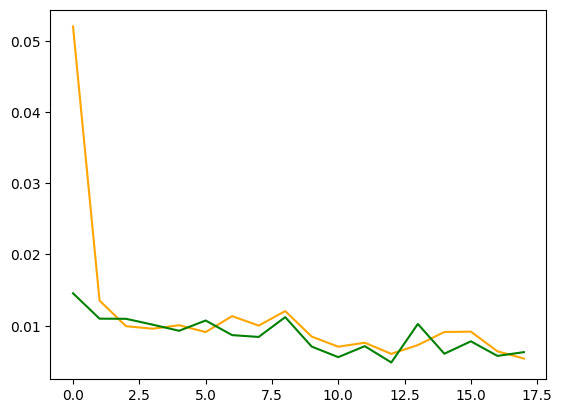

In [119]:
plt.plot(hist.history['loss'] ,  c  = 'orange')
plt.plot(hist.history['val_loss'] ,  c  =  'green')

In [120]:
#  chcek  other  evaluation  metrices
from  sklearn.metrics  import r2_score ,  mean_absolute_error ,  mean_absolute_percentage_error ,  root_mean_squared_error

In [121]:
train_pred  =  nn.predict(x_train)
test_pred  =  nn.predict(x_test)

30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


In [122]:
train_pred

array([[0.21786699],
       [0.49864995],
       [0.2885004 ],
       [0.22642922],
       [0.13220623],
       [0.16824187],
       [0.60503596],
       [0.67936796],
       [0.28469676],
       [0.2981014 ],
       [0.40504158],
       [0.40681335],
       [0.18129814],
       [0.58831406],
       [0.18472463],
       [0.26735258],
       [0.5917691 ],
       [0.75557446],
       [0.65380925],
       [0.28730276],
       [0.63438827],
       [0.18131591],
       [0.2119838 ],
       [0.6528634 ],
       [0.28652504],
       [0.40666837],
       [0.16816346],
       [0.30342752],
       [0.24692261],
       [0.17748939],
       [0.627808  ],
       [0.15408237],
       [0.26543248],
       [0.20900089],
       [0.6368048 ],
       [0.35171512],
       [0.23780794],
       [0.3934673 ],
       [0.31441543],
       [0.23214003],
       [0.18963727],
       [0.2687084 ],
       [0.21754353],
       [0.644012  ],
       [0.20943739],
       [0.21096663],
       [0.72042763],
       [0.684

In [123]:
train_pred.shape

(956, 1)

In [128]:
type(y_train)

pandas.core.series.Series

In [129]:
y_train  =  pd.DataFrame(y_train)
y_test  =  pd.DataFrame(y_test)

In [130]:
y_train1 =  mm.inverse_transform(y_train)


In [133]:
type(train_pred)

numpy.ndarray

In [134]:

train_pred =  pd.DataFrame(train_pred)

In [135]:
train_pred1  =  mm.inverse_transform(train_pred)

In [138]:
y_test1  =  mm.inverse_transform(y_test)


In [139]:
test_pred1  =  mm.inverse_transform(test_pred)

#### training  evaluation

In [137]:
print('r2-->' ,  r2_score(y_train1 ,  train_pred1))
print('RMSE-->' ,  root_mean_squared_error(y_train1 ,  train_pred1))
print('MAE-->' ,  mean_absolute_error(y_train1 ,  train_pred1))
print('MAPE-->' ,  mean_absolute_percentage_error(y_train1 ,  train_pred1))

r2--> 0.915299770758591
RMSE--> 24.50800664626368
MAE--> 19.103565439519524
MAPE--> 0.05692788222649681


#### tesing evaluation

In [143]:
print('r2-->' ,  r2_score(y_test1 ,  test_pred1))
print('RMSE-->' ,  root_mean_squared_error(y_test1 ,  test_pred1))
print('MAE-->' ,  mean_absolute_error(y_test1 ,  test_pred1))
print('MAPE-->' ,  mean_absolute_percentage_error(y_test1 ,  test_pred1))

r2--> 0.9213278379136666
RMSE--> 24.381964475289
MAE--> 19.15768113395659
MAPE--> 0.05654157205967579
